# Universidad Autónoma de Aguascalientes
# Departamento: Ciencias de la Computación
# Materia: Metaheurísticas I
# Profesor: Dr. Francisco Javier Luna Rosas 
# Alumno: Haniel Joab Cruz Chávez
#### Semestre: Agosto-Diciembre 2025

## Actividad No. 2. Ascenso y Descenso del Gradiente en 3D.

### - Definimos el error que comete una red neuronal como la diferencia entre el resultado esperado en una instancia de entrenamiento y el resultado obtenido.
### - La idea principal es representar el error como una función continua de los pesos e intentar llevar la red hacia una configuracion de valores de activacion que nos permita encontrar el mínimo de esta función.
### - Para determinar la magnitud y dirección del cambio debemos introducir en el vector de pesos para reducir el error que está cometiendo, utilizaremos un concepto de "pendiente", que indica que la pendiente de un punto dado es el gardiente de la tangente a la curva de la función en el punto dado
### - El gradiente es la derivada de una operacion tensorial. Es la generalización del concepto de derivadas a funciones que toman tensores como entradas.

## Paso 1: Importar librerías necesarias


In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff, lambdify, symbols, cos
# from sklearn.model_selection import train_test_split

## Paso 2: Definimos la función: f(x) = (12 * cos((x ** 2 + y ** 2)/4))/(3 + x ** 2 + y ** 2)

In [415]:
x, y = symbols('x y')

f = (12 * cos((x ** 2 + y ** 2)/4))/(3 + x ** 2 + y ** 2)

## Paso 3: Graficamos la función


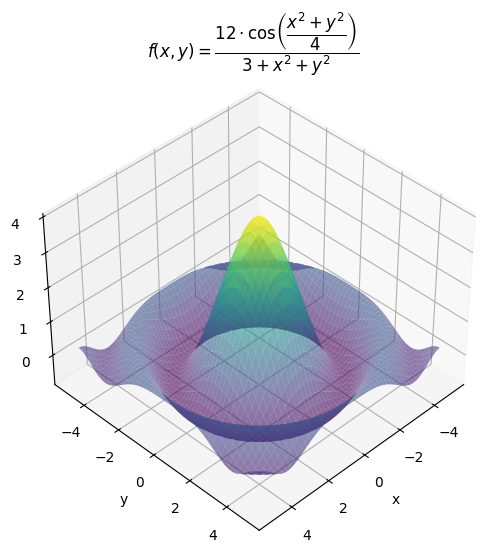

In [416]:
# Convertir la función a funcion numérica
f_func = lambdify((x, y), f, 'numpy')

# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

plt.show()

# El Algoritmo del Descenso del Gradiente


## Paso 3.1: Tome dos puntos al azar X0 y Y0

X =  [0.5]
Y =  [-0.5]
Z =  [3.4018205733576994]


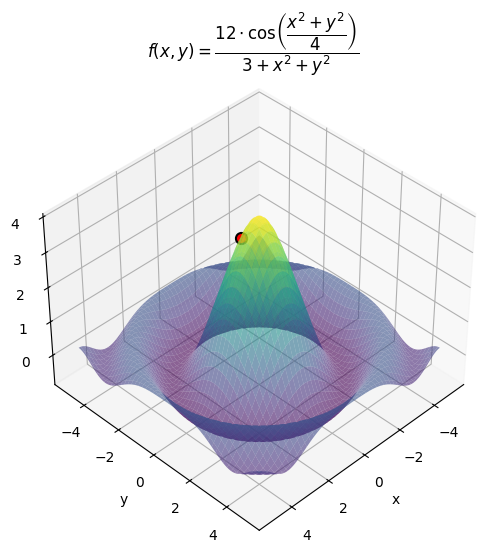

In [417]:
# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

x_value = [0.5]
y_value = [-0.5]
z_value = [float(f_func(x_value[0], y_value[0]))]
ax.plot(
    x_value, y_value, z_value,
    marker='o', color='red', linestyle='-', linewidth=2,
    markersize=8, markeredgecolor='black', markeredgewidth=1.5
)
print("X = ", x_value)
print("Y = ", y_value)
print("Z = ", z_value)

## Paso 3.2: Calcule el valor de las pendientes parciales (derivadas parciales) f'(X0) y f'(Y0)

In [418]:
# La derivada de f con respecto a x y y (Las pendientes parciales)
df_dx = diff(f, x)
df_dy = diff(f, y)

# Convertir las derivadas parciales de la función a funciones numéricas
df_dx_func = lambdify((x, y), df_dx, 'numpy')
df_dy_func = lambdify((x, y), df_dy, 'numpy')

# Evaluar gradiente en (x0, y0)
grad_x = float(df_dx_func(x_value[0], y_value[0]))
grad_y = float(df_dy_func(x_value[0], y_value[0]))

print("Pendiente en X: ", grad_x)
print("Pendiente en Y: ", grad_y)
print("Gradiente: ", (grad_x, grad_y))

Pendiente en X:  -1.078812792432395
Pendiente en Y:  1.078812792432395
Gradiente:  (-1.078812792432395, 1.078812792432395)


## Paso 3.3: Camine en dirección opuesta al vector gradiente: (x1, y1) = (x0, y0) - eta * (f'(X0), f'(Y0))
## Nota. Aquí eta es la tasa de aprendizaje que mencionamos previamente.

In [419]:
eta = 0.05

x_value.append(float(x_value[0] - eta * grad_x))
y_value.append(float(y_value[0] - eta * grad_y))
z_value.append(float(f_func(x_value[0] - eta * grad_x, y_value[0] - eta * grad_y)))
print("X = ", x_value)
print("Y = ", y_value)
print("Z = ", z_value)

X =  [0.5, 0.5539406396216198]
Y =  [-0.5, -0.5539406396216198]
Z =  [3.4018205733576994, 3.2816890471080638]


## Gráficamos el punto 2

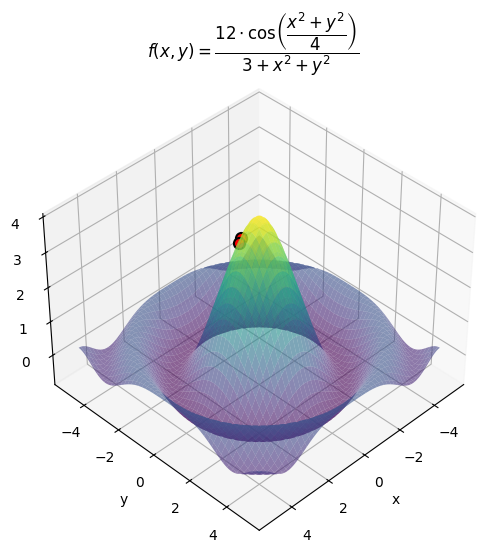

In [420]:
# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

ax.plot(
    x_value, y_value, z_value,
    marker='o', color='red', linestyle='-', linewidth=2,
    markersize=8, markeredgecolor='black', markeredgewidth=1.5
)
plt.show()

## Gráficamos un tercer punto

X =  [0.5, 0.5539406396216198, 0.6078812792432395]
Y =  [-0.5, -0.5539406396216198, -0.6078812792432395]
Z =  [3.4018205733576994, 3.2816890471080638, 3.154758181393051] 

Pendiente en x[0]:  -1.078812792432395
Pendiente en y[0]:  1.078812792432395
Gradiente:  (-1.078812792432395, 1.078812792432395) 

Pendiente en x[1]:  -1.1466512320556215
Pendiente en y[1]:  1.1466512320556215
Gradiente:  (-1.1466512320556215, 1.1466512320556215) 

Pendiente en x[2]:  -1.2049837892527158
Pendiente en y[2]:  1.2049837892527158
Gradiente:  (-1.2049837892527158, 1.2049837892527158)


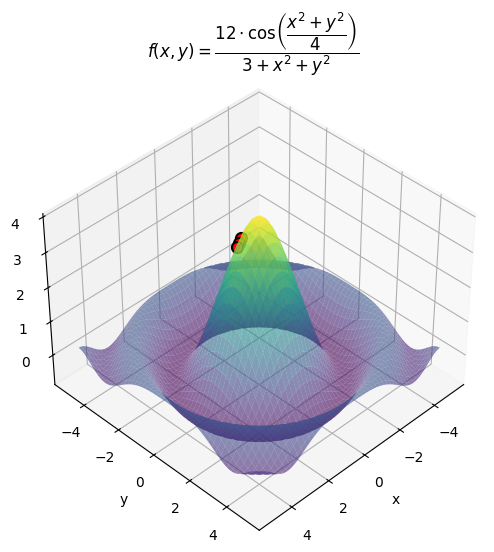

In [421]:
x_value.append(float(x_value[1] - eta * grad_x))
y_value.append(float(y_value[1] - eta * grad_y))
z_value.append(float(f_func(x_value[1] - eta * grad_x, y_value[1] - eta * grad_y)))
print("X = ", x_value)
print("Y = ", y_value)
print("Z = ", z_value, "\n")

grad_x = float(df_dx_func(x_value[0], y_value[0]))
grad_y = float(df_dy_func(x_value[0], y_value[0]))
print("Pendiente en x[0]: ", grad_x)
print("Pendiente en y[0]: ", grad_y)
print("Gradiente: ", (grad_x, grad_y), "\n")
grad_x = float(df_dx_func(x_value[1], y_value[1]))
grad_y = float(df_dy_func(x_value[1], y_value[1]))
print("Pendiente en x[1]: ", grad_x)
print("Pendiente en y[1]: ", grad_y)
print("Gradiente: ", (grad_x, grad_y), "\n")
grad_x = float(df_dx_func(x_value[2], y_value[2]))
grad_y = float(df_dy_func(x_value[2], y_value[2]))
print("Pendiente en x[2]: ", grad_x)
print("Pendiente en y[2]: ", grad_y)
print("Gradiente: ", (grad_x, grad_y))

# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

ax.plot(
    x_value, y_value, z_value,
    marker='o', color='red', linestyle='-', linewidth=2,
    markersize=8, markeredgecolor='black', markeredgewidth=1.5
)
plt.show()

## Graficamos 20 puntos mas

           X         Y         Z  Pendiente X  Pendiente Y  \
0   0.500000 -0.500000  3.401821    -1.078813     1.078813   
1   0.553941 -0.553941  3.281689    -1.078813     1.078813   
2   0.611273 -0.611273  3.146572    -1.146651     1.146651   
3   0.671691 -0.671691  2.997169    -1.208351     1.208351   
4   0.734830 -0.734830  2.834665    -1.262779     1.262779   
5   0.800296 -0.800296  2.660611    -1.309318     1.309318   
6   0.867688 -0.867688  2.476769    -1.347858     1.347858   
7   0.936622 -0.936622  2.284985    -1.378672     1.378672   
8   1.006735 -1.006735  2.087092    -1.402251     1.402251   
9   1.077691 -1.077691  1.884877    -1.419124     1.419124   
10  1.149176 -1.149176  1.680079    -1.429701     1.429701   
11  1.220885 -1.220885  1.474435    -1.434184     1.434184   
12  1.292511 -1.292511  1.269723    -1.432523     1.432523   
13  1.363733 -1.363733  1.067801    -1.424436     1.424436   
14  1.434207 -1.434207  0.870622    -1.409472     1.409472   
15  1.50

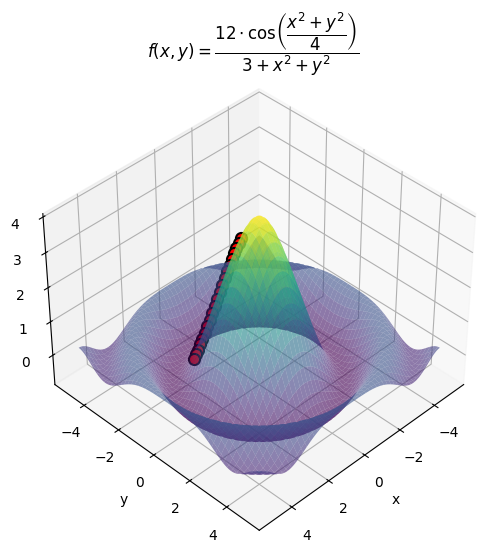

In [422]:
eta = 0.05
#eta = 0.07
x_value = [0.5]
y_value = [-0.5]
z_value = [float(f_func(x_value[0], y_value[0]))]

grad_values_x = [float(df_dx_func(x_value[0], y_value[0]))]
grad_values_y = [float(df_dy_func(x_value[0], y_value[0]))]
for i in range(20):
    x_value.append(x_value[i] - eta * df_dx_func(x_value[i], y_value[i]))
    y_value.append(y_value[i] - eta * df_dy_func(x_value[i], y_value[i]))
    z_value.append(f_func(x_value[i] - eta * df_dx_func(x_value[i], y_value[i]), y_value[i] - eta * df_dy_func(x_value[i], y_value[i])))
    grad_values_x.append(float(df_dx_func(x_value[i], y_value[i])))
    grad_values_y.append(float(df_dy_func(x_value[i], y_value[i])))

dt = pd.DataFrame({"X": x_value, "Y": y_value, "Z": z_value, "Pendiente X": grad_values_x, "Pendiente Y": grad_values_y, "Gradiente": list(zip(grad_values_x, grad_values_y))})
print(dt)

# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

ax.plot(
    x_value, y_value, z_value,
    marker='o', color='red', linestyle='-', linewidth=2,
    markersize=8, markeredgecolor='black', markeredgewidth=1.5
)

plt.show()

# El Algoritmo del Ascenso del Gradiente


## Paso 3.4: Tome dos puntos al azar X0 y Y0

X =  [1.25]
Y =  [-1.25]
Z =  [1.3910867922927275]


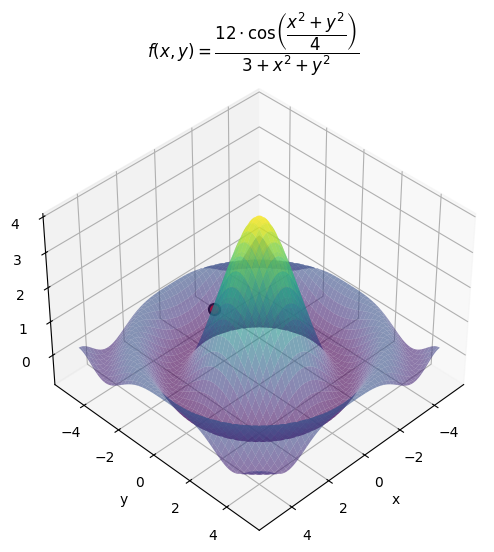

In [423]:
# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

x_value = [1.25]
y_value = [-1.25]
z_value = [float(f_func(x_value[0], y_value[0]))]
ax.plot(
    x_value, y_value, z_value,
    marker='o', color='red', linestyle='-', linewidth=2,
    markersize=8, markeredgecolor='black', markeredgewidth=1.5
)
print("X = ", x_value)
print("Y = ", y_value)
print("Z = ", z_value)

## Paso 3.5: Calcule el valor de las pendientes parciales (derivadas parciales) f'(X0) y f'(Y0)

In [424]:
# La derivada de f con respecto a x y y (Las pendientes parciales)
df_dx = diff(f, x)
df_dy = diff(f, y)

# Convertir las derivadas parciales de la función a funciones numéricas
df_dx_func = lambdify((x, y), df_dx, 'numpy')
df_dy_func = lambdify((x, y), df_dy, 'numpy')

# Evaluar gradiente en (x0, y0)
grad_x = float(df_dx_func(x_value[0], y_value[0]))
grad_y = float(df_dy_func(x_value[0], y_value[0]))

print("Pendiente en X: ", grad_x)
print("Pendiente en Y: ", grad_y)
print("Gradiente: ", (grad_x, grad_y))

Pendiente en X:  -1.430036459859726
Pendiente en Y:  1.430036459859726
Gradiente:  (-1.430036459859726, 1.430036459859726)


## Paso 3.6: Camine en la misma dirección al vector gradiente: (x1, y1) = (x0, y0) + eta * (f'(X0), f'(Y0))
## Nota. Aquí eta es la tasa de aprendizaje que mencionamos previamente.

In [425]:
eta = 0.05

x_value.append(float(x_value[0] + eta * grad_x))
y_value.append(float(y_value[0] + eta * grad_y))
z_value.append(float(f_func(x_value[0] + eta * grad_x, y_value[0] + eta * grad_y)))
print("X = ", x_value)
print("Y = ", y_value)
print("Z = ", z_value)

X =  [1.25, 1.1784981770070138]
Y =  [-1.25, -1.1784981770070138]
Z =  [1.3910867922927275, 1.5959647668409453]


## Gráficamos el punto 2

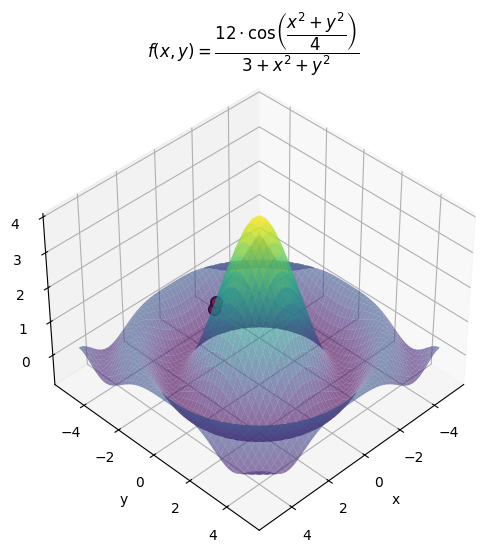

In [426]:
# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

ax.plot(
    x_value, y_value, z_value,
    marker='o', color='red', linestyle='-', linewidth=2,
    markersize=8, markeredgecolor='black', markeredgewidth=1.5
)
plt.show()

## Gráficamos un tercer punto

X =  [1.25, 1.1784981770070138, 1.1069963540140275]
Y =  [-1.25, -1.1784981770070138, -1.1069963540140275]
Z =  [1.3910867922927275, 1.5959647668409453, 1.801000006502937] 

Pendiente en x[0]:  -1.430036459859726
Pendiente en y[0]:  1.430036459859726
Gradiente:  (-1.430036459859726, 1.430036459859726) 

Pendiente en x[1]:  -1.4342587625573988
Pendiente en y[1]:  1.4342587625573988
Gradiente:  (-1.4342587625573988, 1.4342587625573988) 

Pendiente en x[2]:  -1.4322765678088842
Pendiente en y[2]:  1.4322765678088842
Gradiente:  (-1.4322765678088842, 1.4322765678088842)


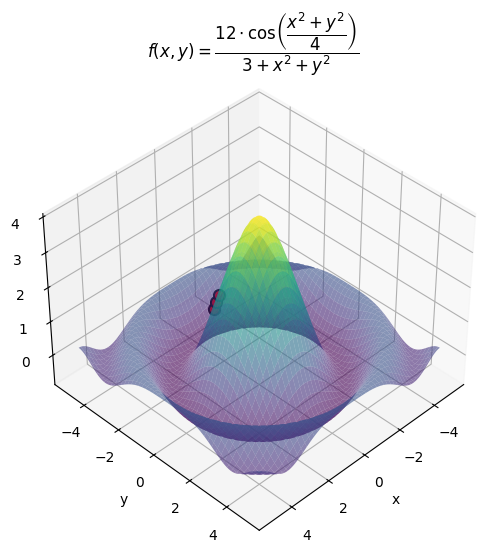

In [427]:
x_value.append(float(x_value[1] + eta * grad_x))
y_value.append(float(y_value[1] + eta * grad_y))
z_value.append(float(f_func(x_value[1] + eta * grad_x, y_value[1] + eta * grad_y)))
print("X = ", x_value)
print("Y = ", y_value)
print("Z = ", z_value, "\n")

grad_x = float(df_dx_func(x_value[0], y_value[0]))
grad_y = float(df_dy_func(x_value[0], y_value[0]))
print("Pendiente en x[0]: ", grad_x)
print("Pendiente en y[0]: ", grad_y)
print("Gradiente: ", (grad_x, grad_y), "\n")
grad_x = float(df_dx_func(x_value[1], y_value[1]))
grad_y = float(df_dy_func(x_value[1], y_value[1]))
print("Pendiente en x[1]: ", grad_x)
print("Pendiente en y[1]: ", grad_y)
print("Gradiente: ", (grad_x, grad_y), "\n")
grad_x = float(df_dx_func(x_value[2], y_value[2]))
grad_y = float(df_dy_func(x_value[2], y_value[2]))
print("Pendiente en x[2]: ", grad_x)
print("Pendiente en y[2]: ", grad_y)
print("Gradiente: ", (grad_x, grad_y))

# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

ax.plot(
    x_value, y_value, z_value,
    marker='o', color='red', linestyle='-', linewidth=2,
    markersize=8, markeredgecolor='black', markeredgewidth=1.5
)
plt.show()

## Graficamos 20 puntos mas

           X         Y         Z  Pendiente X  Pendiente Y  \
0   1.250000 -1.250000  1.391087    -1.430036     1.430036   
1   1.178498 -1.178498  1.595965    -1.430036     1.430036   
2   1.106785 -1.106785  1.801605    -1.434259     1.434259   
3   1.035172 -1.035172  2.006233    -1.432262     1.432262   
4   0.963966 -0.963966  2.208091    -1.424115     1.424115   
5   0.893485 -0.893485  2.405385    -1.409633     1.409633   
6   0.824066 -0.824066  2.596247    -1.388370     1.388370   
7   0.756082 -0.756082  2.778722    -1.359680     1.359680   
8   0.689940 -0.689940  2.950813    -1.322844     1.322844   
9   0.626077 -0.626077  3.110582    -1.277256     1.277256   
10  0.564945 -0.564945  3.256314    -1.222650     1.222650   
11  0.506980 -0.506980  3.386696    -1.159300     1.159300   
12  0.452572 -0.452572  3.500990    -1.088150     1.088150   
13  0.402032 -0.402032  3.599128    -1.010811     1.010811   
14  0.355561 -0.355561  3.681707    -0.929406     0.929406   
15  0.31

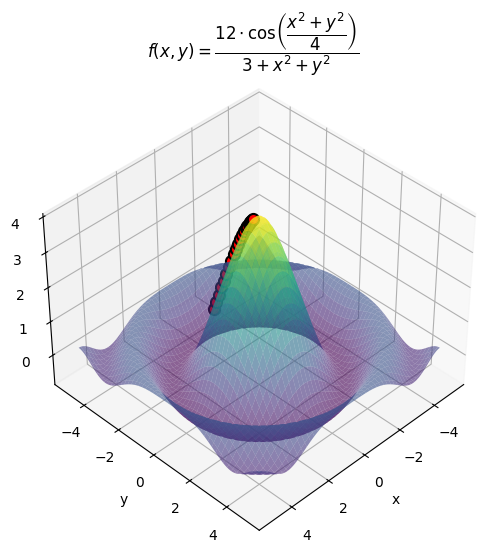

In [428]:
eta = 0.05
#eta = 0.07
x_value = [1.25]
y_value = [-1.25]
z_value = [float(f_func(x_value[0], y_value[0]))]

grad_values_x = [float(df_dx_func(x_value[0], y_value[0]))]
grad_values_y = [float(df_dy_func(x_value[0], y_value[0]))]
for i in range(20):
    x_value.append(x_value[i] + eta * df_dx_func(x_value[i], y_value[i]))
    y_value.append(y_value[i] + eta * df_dy_func(x_value[i], y_value[i]))
    z_value.append(f_func(x_value[i] + eta * df_dx_func(x_value[i], y_value[i]), y_value[i] + eta * df_dy_func(x_value[i], y_value[i])))
    grad_values_x.append(float(df_dx_func(x_value[i], y_value[i])))
    grad_values_y.append(float(df_dy_func(x_value[i], y_value[i])))

dt = pd.DataFrame({"X": x_value, "Y": y_value, "Z": z_value, "Pendiente X": grad_values_x, "Pendiente Y": grad_values_y, "Gradiente": list(zip(grad_values_x, grad_values_y))})
print(dt)

# Crear una malla de valores (X, Y)
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = f_func(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

# Opciones de vista
ax.set_title(r'$f(x,y)=\dfrac{12\cdot \cos\!\left(\dfrac{x^2+y^2}{4}\right)}{3+x^2+y^2}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=40, azim=45)  # ángulo de cámara

ax.plot(
    x_value, y_value, z_value,
    marker='o', color='red', linestyle='-', linewidth=2,
    markersize=8, markeredgecolor='black', markeredgewidth=1.5
)

plt.show()

## Conclusiones

### Definimos el error que comete una red neuronal como la diferencia entre el resultado esperado en una instancia de entranmiento y el resultado obtenido.

### La idea principal es representar el error como una funcion continua de los pesos e intentar llevar la red hacia una configuracion de valores de activacion que nos permita encontrar el minimo de esta funcion.

### En esta práctica, demostramos como encontrar el mínimo de una función continua aplicando el algoritmo del gradiente (gradiente en 3D), para optimizar la función de costo de una NNBP.

## Bibliografia

### Machine Learning in Python,(2025). URL: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### URL: Optimizers (2025) https://keras.io/api/optimizers/

### Oldemar Rodriguez (2025). Reporte Técnico de PROMIDAT: http://promidat.com/ 